# **Travel Insurance Analytics**

By : Siti Andriana

## **Business Problem Understanding**

### **Latar Belakang**

Asuransi perjalanan adalah salah satu asuransi umum yang ditawarkan untuk memberikan perlindungan jika terjadi sesuatu yang tidak diinginkan selama perjalanan, baik perjalanan  domestik maupun internasional. Besaran premi yang dibayar bergantung pada lamanya perjalanan, plan yang diinginkan, dan tujuan perjalanan. Beberapa negara mewajibkan orang-orang yang ingin melakukan keberangkatan untuk memiliki asuransi perjalanan, seperti di Eropa dan Amerika.

### **Rumusan Masalah**

Salah satu masalah yang terjadi saat klaim asuransi adalah lambatnya proses pencairan klaim asuransi. Karena hal tersebut, perusahaan asuransi ingin memprediksi apakah pemilik polis akan melakukan klaim asuransi atau tidak untuk meningkatkan efisiensi proses pencairan klaim para pemilik polis. Diharapkan dengan meningkatnya efisiensi pada proses pencairan klaim, para pemilik polis akan meneruskan membeli produk asuransi perjalanan tersebut.

Manfaat lain dari digunakannya machine learning untuk memprediksi apakah pelanggan akan klaim asuransi atau tidak adalah perusahaan asuransi dapat menentukan strategi keuangan yang tepat, seperti estimasi jumlah uang cadangan yang harus disiapkan. Perusahaan asuransi juga bisa menggunakan data tersebut sebagai gambaran untuk menetapkan besaran premi asuransi dan ketentuan dalam polis asuransi.

### **Tujuan Analisis**

Untuk memprediksi apakah pemilik polis akan melakukan klaim asuransi atau tidak.

### **Data yang Dimiliki**

1. Agency : nama agensi
2. Agency Type : tipe agensi
3. Distribution Channel : channel yang disediakan oleh agensi
4. Product Name : nama produk asuransi perjalanan
5. Gender : jenis kelamin yang ditanggung
6. Duration : lama waktu perjalanan
7. Destination : negara tujuan perjalanan
8. Net Sales : jumlah penjualan polis asuransi
9. Commission (in value) : komisi yang diterima agensi
10. Age : usia yang ditanggung
11. Claim : status klaim

### **Target dan Metrik yang Digunakan**

**Menentukan Target**

Karena kita akan memprediksi apakah pemilik polis akan melakukan klaim atau tidak, maka kolom yang menjadi target adalah kolom 'Claim' dengan :
- positif (Y = 1) adalah klaim
- negatif (Y = 0) adalah tidak klaim

**Hubungan antara hasil prediksi dengan data aktual :**
- FP (False Positive) : hasil prediksi pemilik polis akan klaim, padahal tidak klaim
- FN (False Negative) : hasil prediksi pemilik polis tidak klaim, padahal klaim
- TP (True Positive) : hasil prediksi dan aktual adalah pemilik polis akan klaim
- TF (True Negative) : hasil prediksi dan aktual adalah pemilik polis tidak akan klaim

**Menentukan Metrik yang Digunakan**
- Jika yang terjadi adalah FP, maka risiko yang akan diterima oleh perusahaan asuransi adalah :
    - menyediakan dana untuk persiapan klaim dari pemilik polis, sehingga premi yang ada tidak dapat diinvestasikan. 

- Jika yang terjadi adalah FN, maka risiko yang akan diterima oleh perusahaan asuransi adalah :
    - pelanggan berhenti membeli polis karena merasa tidak puas atas pelayanan perusahaan asuransi akibat dari lamanya proses pencairan klaim asuransi.
    - berhentinya pelanggan mengakibatkan hilangnya dana yang dapat diinvestasikan oleh pihak perusahaan.
    - diperlukan budget tambahan untuk marketing (mencari pelanggan baru)

Dari penjabaran risiko di atas, risiko yang lebih besar akan diterima oleh perusahaan asuransi jika terjadi FN. Oleh karena itu, kita akan menggunakan metrik untuk mereduksi terjadinya FN, yaitu **recall**.

## **Data Understanding & Data Cleaning**

### **Import Library yang akan digunakan**

In [483]:
# import libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# lib for imbalanced treatment
from imblearn.under_sampling import RandomUnderSampler, NearMiss, CondensedNearestNeighbour, TomekLinks
from imblearn.over_sampling import RandomOverSampler, SMOTE, ADASYN, BorderlineSMOTE, KMeansSMOTE, SVMSMOTE
# kalau di dalam pipeline ada digunakan imblearn, gunakan ini:
from imblearn.pipeline import Pipeline

# untuk mencari korelasi antar kategori (kategori mana saja yang berpengaruh pd target)
from scipy.stats import chi2_contingency

# splitting data
from sklearn.model_selection import train_test_split

# import library preprocessing
# missing value
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, IterativeImputer, KNNImputer

# scaling 
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler

# encoding
from sklearn.preprocessing import OneHotEncoder
import category_encoders as ce
from category_encoders import BinaryEncoder, OrdinalEncoder

# column transform
from sklearn.compose import ColumnTransformer

# pipeline
# from sklearn.pipeline import Pipeline

# cross validation
from sklearn.model_selection import cross_val_score

# modeling
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

# hyperparameter tuning
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# metrics evaluation: accuracy
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

# ensemble learning
from sklearn.ensemble import StackingClassifier, VotingClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier

# hyperparameter tuning
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

import warnings
warnings.filterwarnings('ignore')

### **Import Dataset**

In [484]:
# load dataset

df = pd.read_csv("data_travel_insurance.csv")
df.head()

,Agency,Agency Type,Distribution Channel,Product Name,Gender,Duration,Destination,Net Sales,Commision (in value),Age,Claim
0,C2B,Airlines,Online,Annual Silver Plan,F,365,SINGAPORE,216.0,54.0,57,No
1,EPX,Travel Agency,Online,Cancellation Plan,NaN,4,MALAYSIA,10.0,0.0,33,No
2,JZI,Airlines,Online,Basic Plan,M,19,INDIA,22.0,7.7,26,No
3,EPX,Travel Agency,Online,2 way Comprehensive Plan,NaN,20,UNITED STATES,112.0,0.0,59,No
4,C2B,Airlines,Online,Bronze Plan,M,8,SINGAPORE,16.0,4.0,28,No


### **Cek Banyak Kolom dan Banyak Baris pada Dataset**

In [485]:
df.shape

(44328, 11)

### **Membuat Tabel Info Umum**

Tabel ini berisi:
- Nama Kolom
- Tipe Data setiap kolom
- Jumlah Missing Values
- Persentase Missing Values
- Banyaknya elemen unik
- Sampel elemen unik

Tabel info umum ini dibuat agar mudah untuk menentukan langkah selanjutnya yang akan dilakukan.

- Dengan mengetahui jumlah dan persentase missing values, kita bisa menentukan treatment apa yang lebih baik digunakan untuk menangani missing values tersebut.
- Dengan mengetahui tipe data, kita bisa melihat apakah ada tipe data yang tidak sesuai.
- Dengan mengetahui tipe data dan banyaknya elemen unik, kita bisa menentukan feature engineering apa yang cocok untuk digunakan.

In [486]:
# extract general info

list_item = []

for i in df.columns :
    list_item.append([
        i,
        df[i].dtype,
        df[i].isna().sum(),
        round(df[i].isna().sum()/len(df)*100,2),
        df[i].nunique(),
        df[i].unique()[:3]
    ])

info_df = pd.DataFrame(list_item,
                       columns = 'Nama Kolom, Tipe Data, Jumlah Missing Value, % Missing Value, N Unique, Unique Sample'.split(', '))

info_df

,Nama Kolom,Tipe Data,Jumlah Missing Value,% Missing Value,N Unique,Unique Sample
0,Agency,object,0,0.00,16,"[C2B, EPX, JZI]"
1,Agency Type,object,0,0.00,2,"[Airlines, Travel Agency]"
2,Distribution Channel,object,0,0.00,2,"[Online, Offline]"
3,Product Name,object,0,0.00,26,"[Annual Silver Plan, Cancellation Plan, Basic ..."
4,Gender,object,31647,71.39,2,"[F, nan, M]"
5,Duration,int64,0,0.00,437,"[365, 4, 19]"
6,Destination,object,0,0.00,138,"[SINGAPORE, MALAYSIA, INDIA]"
7,Net Sales,float64,0,0.00,1006,"[216.0, 10.0, 22.0]"
8,Commision (in value),float64,0,0.00,915,"[54.0, 0.0, 7.7]"
9,Age,int64,0,0.00,89,"[57, 33, 26]"


**Insight**

Dari tabel di atas, diperoleh kolom 'Gender' memiliki **lebih dari** 70% missing values.

### **Drop Kolom Gender**

Karena kolom 'Gender' memiliki lebih dari 70% missing values, maka agar saat analisis data tidak bias, kolom 'Gender' akan dihapus.

In [487]:
# drop kolom gender

df = df.drop(['Gender'], axis = 1)
df.head()

,Agency,Agency Type,Distribution Channel,Product Name,Duration,Destination,Net Sales,Commision (in value),Age,Claim
0,C2B,Airlines,Online,Annual Silver Plan,365,SINGAPORE,216.0,54.0,57,No
1,EPX,Travel Agency,Online,Cancellation Plan,4,MALAYSIA,10.0,0.0,33,No
2,JZI,Airlines,Online,Basic Plan,19,INDIA,22.0,7.7,26,No
3,EPX,Travel Agency,Online,2 way Comprehensive Plan,20,UNITED STATES,112.0,0.0,59,No
4,C2B,Airlines,Online,Bronze Plan,8,SINGAPORE,16.0,4.0,28,No


### **Mengecek Describe untuk Data Numerik**

Berisi : 
- count (banyaknya data)
- mean (rata-rata)
- std (standar deviasi)
- min (nilai minimum pada data)
- 25% (nilai kuartil bawah)
- 50% (nilai kuartil tengah/median data)
- 75% (nilai kuartil atas)
- max (nilai maksimum pada data)

In [488]:
# cek describe

df.describe()

,Duration,Net Sales,Commision (in value),Age
count,44328.000000,44328.000000,44328.000000,44328.000000
mean,49.424292,40.550948,9.707692,39.925600
std,109.153961,48.661970,19.625637,13.954926
min,-1.000000,-357.500000,0.000000,0.000000
25%,9.000000,18.000000,0.000000,35.000000
50%,22.000000,26.500000,0.000000,36.000000
75%,53.000000,48.000000,11.550000,43.000000
max,4881.000000,810.000000,283.500000,118.000000


**Insight**

- Pada kolom 'Duration' dan kolom 'Net Sales' terdapat nilai negatif.
- Terdapat anomali pada kolom 'Duration', dimana lama perjalanan pemilik polis melebihi 1 tahun atau 365 hari.

### **Mengambil Data Duration yang Lebih dari 0**

Karena kolom 'Duration' menunjukkan lama perjalanan seseorang, maka kolom 'Duration' tidak mungkin bernilai negatif, sehingga akan kita ambil data dengan 'Duration' lebih dari 0.

In [489]:
# mengambil data duration >= 0

df = df[df['Duration']>=0]
df.head()

,Agency,Agency Type,Distribution Channel,Product Name,Duration,Destination,Net Sales,Commision (in value),Age,Claim
0,C2B,Airlines,Online,Annual Silver Plan,365,SINGAPORE,216.0,54.0,57,No
1,EPX,Travel Agency,Online,Cancellation Plan,4,MALAYSIA,10.0,0.0,33,No
2,JZI,Airlines,Online,Basic Plan,19,INDIA,22.0,7.7,26,No
3,EPX,Travel Agency,Online,2 way Comprehensive Plan,20,UNITED STATES,112.0,0.0,59,No
4,C2B,Airlines,Online,Bronze Plan,8,SINGAPORE,16.0,4.0,28,No


### **Mengambil Data Net Sales yang Lebih dari 0**

Karena kolom 'Net Sales' menunjukkan jumlah penjualan polis asuransi, maka kolom 'Net Sales' tidak mungkin bernilai negatif, sehingga akan kita ambil data dengan 'Net Sales' lebih dari 0.

In [490]:
# mengambil data net sales >= 0

df = df[df['Net Sales']>=0]
df.head()

,Agency,Agency Type,Distribution Channel,Product Name,Duration,Destination,Net Sales,Commision (in value),Age,Claim
0,C2B,Airlines,Online,Annual Silver Plan,365,SINGAPORE,216.0,54.0,57,No
1,EPX,Travel Agency,Online,Cancellation Plan,4,MALAYSIA,10.0,0.0,33,No
2,JZI,Airlines,Online,Basic Plan,19,INDIA,22.0,7.7,26,No
3,EPX,Travel Agency,Online,2 way Comprehensive Plan,20,UNITED STATES,112.0,0.0,59,No
4,C2B,Airlines,Online,Bronze Plan,8,SINGAPORE,16.0,4.0,28,No


### **Cek Outliers**

Untuk data numerik, akan dicek outliersnya.

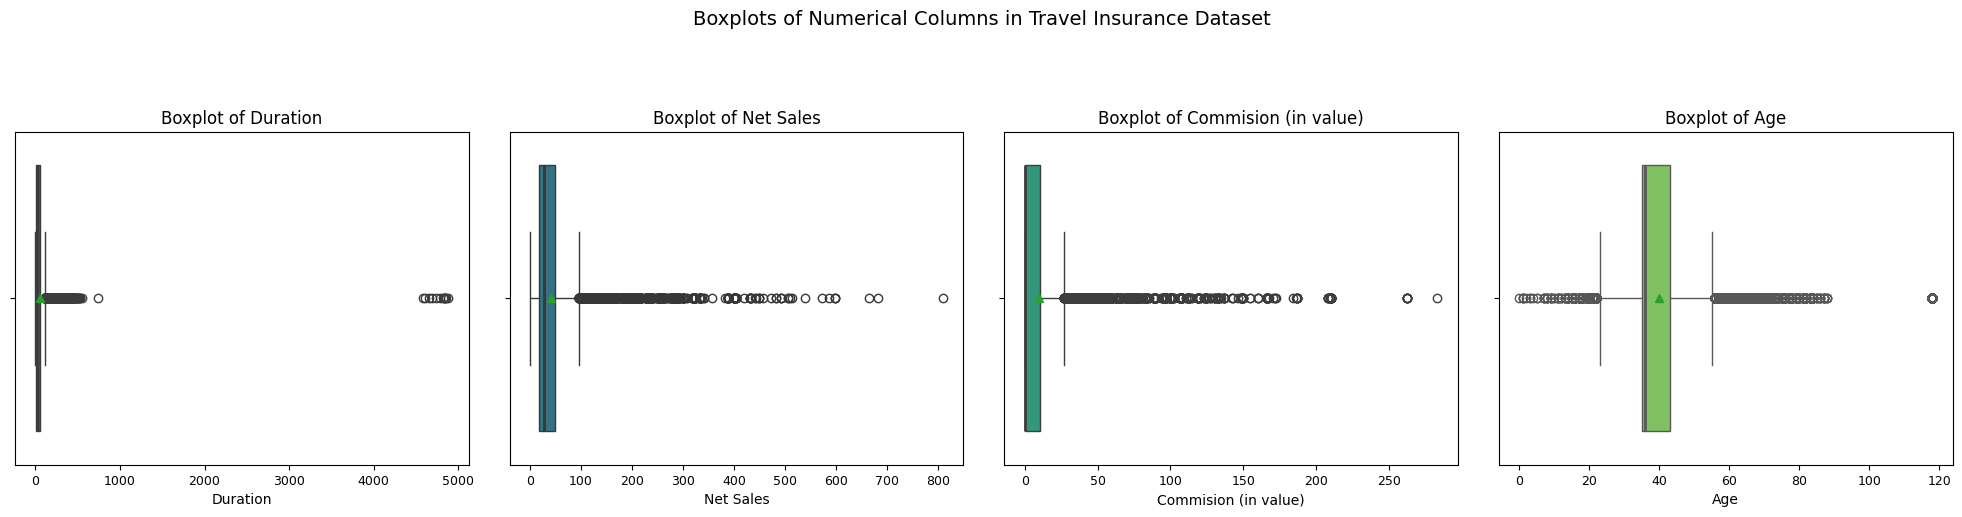

In [491]:
# check outlier

# Select numerical columns
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
selected_columns = numerical_columns[:4]

# Create a visually appealing color palette
color_palette = sns.color_palette("viridis", n_colors=len(numerical_columns))

# Create subplot grid with correct format
fig, axes = plt.subplots(int(np.ceil(len(numerical_columns) / 4)), 4, figsize=(20, 5 * int(np.ceil(len(numerical_columns) / 5))), sharey=True)
axes = axes.flatten()  # Ensure axes is a 1D array of axes objects

# Create boxplots for each numerical column
for i, column in enumerate(numerical_columns):
    sns.boxplot(
        x=df[column], ax=axes[i], color=color_palette[i], showmeans=True, medianprops={"linewidth": 2}
    )
    axes[i].set_title(f'Boxplot of {column}', fontsize=12)
    axes[i].set_xlabel(column, fontsize=10)

    axes[i].tick_params(axis="both", which="major", labelsize=9)  # Adjust tick label size

# Refine overall layout
plt.suptitle("Boxplots of Numerical Columns in Travel Insurance Dataset", fontsize=14, y=1.05)  # Add a comprehensive title
plt.tight_layout(pad=2)  # Adjust spacing for visual clarity
plt.show()

**Insight**

- Pada kolom 'Age' terdapat outliers yang sangat ekstrem, dimana usia dari penumpang lebih dari 100 tahun (dimana kemungkinan case ini terjadi sangat kecil), sehingga data tersebut akan didrop.
- Pada kolom 'Duration' terdapat outliers yang sangat ekstrem, yaitu ketika lama perjalanannya melebihi 1000 hari.
- Pada kolom 'Commision (in value) terdapat outliers ekstrem, yaitu ketika komisinya lebih dari 250, sehingga data tersebut akan didrop.

### **Mengambil Data Age yang Kurang dari 100**

Dari boxplot, diperoleh data dengan outliers ekstremnya berada di data lebih dari 100, dan tidak ada data yang nilainya antara 100 sampai dengan 110, maka kita ambil data 'Age' yang kurang dari 100.

In [492]:
# mengambil data age < 100

df = df[df['Age']<100]
df.head()

,Agency,Agency Type,Distribution Channel,Product Name,Duration,Destination,Net Sales,Commision (in value),Age,Claim
0,C2B,Airlines,Online,Annual Silver Plan,365,SINGAPORE,216.0,54.0,57,No
1,EPX,Travel Agency,Online,Cancellation Plan,4,MALAYSIA,10.0,0.0,33,No
2,JZI,Airlines,Online,Basic Plan,19,INDIA,22.0,7.7,26,No
3,EPX,Travel Agency,Online,2 way Comprehensive Plan,20,UNITED STATES,112.0,0.0,59,No
4,C2B,Airlines,Online,Bronze Plan,8,SINGAPORE,16.0,4.0,28,No


### **Mengambil Data Commision yang Kurang dari 250**

Dari boxplot, diperoleh data dengan outliers ekstremnya berada di data lebih dari 250 maka kita ambil data 'Commision' yang kurang dari 250.

In [493]:
# mengambil data commision < 250

df = df[df['Commision (in value)']<250]
df.head()

,Agency,Agency Type,Distribution Channel,Product Name,Duration,Destination,Net Sales,Commision (in value),Age,Claim
0,C2B,Airlines,Online,Annual Silver Plan,365,SINGAPORE,216.0,54.0,57,No
1,EPX,Travel Agency,Online,Cancellation Plan,4,MALAYSIA,10.0,0.0,33,No
2,JZI,Airlines,Online,Basic Plan,19,INDIA,22.0,7.7,26,No
3,EPX,Travel Agency,Online,2 way Comprehensive Plan,20,UNITED STATES,112.0,0.0,59,No
4,C2B,Airlines,Online,Bronze Plan,8,SINGAPORE,16.0,4.0,28,No


### **Mengambil Data Duration yang Kurang dari 1000**

Dari boxplot, diperoleh data dengan outliers ekstremnya berada di data lebih dari 1000, maka diambil data 'Duration' yang kurang dari 1000.

In [494]:
# mengambil data duration < 1000

df = df[df['Duration']<1000]
df.head()

,Agency,Agency Type,Distribution Channel,Product Name,Duration,Destination,Net Sales,Commision (in value),Age,Claim
0,C2B,Airlines,Online,Annual Silver Plan,365,SINGAPORE,216.0,54.0,57,No
1,EPX,Travel Agency,Online,Cancellation Plan,4,MALAYSIA,10.0,0.0,33,No
2,JZI,Airlines,Online,Basic Plan,19,INDIA,22.0,7.7,26,No
3,EPX,Travel Agency,Online,2 way Comprehensive Plan,20,UNITED STATES,112.0,0.0,59,No
4,C2B,Airlines,Online,Bronze Plan,8,SINGAPORE,16.0,4.0,28,No


### **Cek Outliers Setelah Data Outliers Didrop**

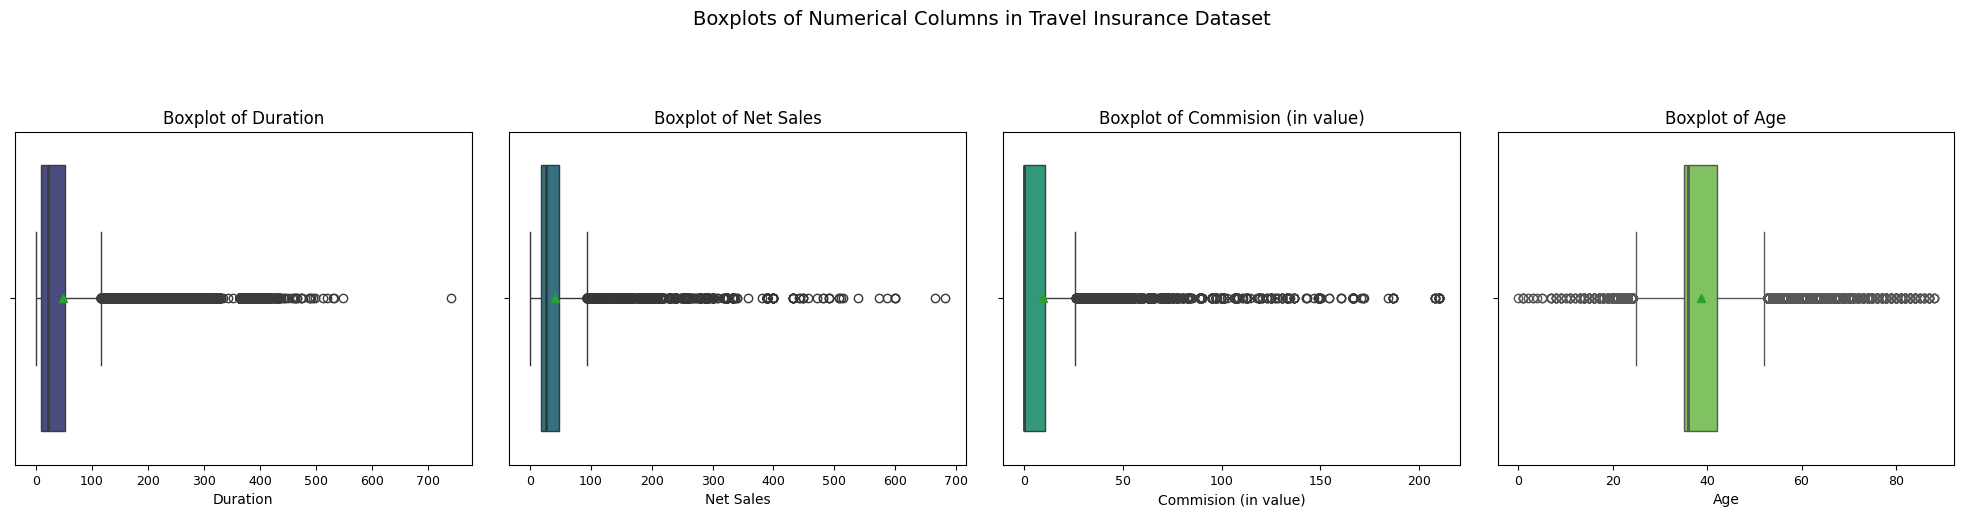

In [495]:
# check outlier

# Select numerical columns
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
selected_columns = numerical_columns[:4]

# Create a visually appealing color palette
color_palette = sns.color_palette("viridis", n_colors=len(numerical_columns))

# Create subplot grid with correct format
fig, axes = plt.subplots(int(np.ceil(len(numerical_columns) / 4)), 4, figsize=(20, 5 * int(np.ceil(len(numerical_columns) / 5))), sharey=True)
axes = axes.flatten()  # Ensure axes is a 1D array of axes objects

# Create boxplots for each numerical column
for i, column in enumerate(numerical_columns):
    sns.boxplot(
        x=df[column], ax=axes[i], color=color_palette[i], showmeans=True, medianprops={"linewidth": 2}
    )
    axes[i].set_title(f'Boxplot of {column}', fontsize=12)
    axes[i].set_xlabel(column, fontsize=10)

    axes[i].tick_params(axis="both", which="major", labelsize=9)  # Adjust tick label size

# Refine overall layout
plt.suptitle("Boxplots of Numerical Columns in Travel Insurance Dataset", fontsize=14, y=1.05)  # Add a comprehensive title
plt.tight_layout(pad=2)  # Adjust spacing for visual clarity
plt.show()

**Insight**

Masih terdapat data ekstrem pada kolom 'Duration', yaitu data dengan nilai lebih dari 700, sehingga data tersebut akan didrop.

### **Mengambil Data Duration yang Kurang dari 600**

Dari boxplot, diperoleh data dengan outliers ekstremnya berada di data lebih dari 600, maka diambil data 'Duration' yang kurang dari 600.

In [496]:
# mengambil data duration < 600

df = df[df['Duration']<600]
df.head()

,Agency,Agency Type,Distribution Channel,Product Name,Duration,Destination,Net Sales,Commision (in value),Age,Claim
0,C2B,Airlines,Online,Annual Silver Plan,365,SINGAPORE,216.0,54.0,57,No
1,EPX,Travel Agency,Online,Cancellation Plan,4,MALAYSIA,10.0,0.0,33,No
2,JZI,Airlines,Online,Basic Plan,19,INDIA,22.0,7.7,26,No
3,EPX,Travel Agency,Online,2 way Comprehensive Plan,20,UNITED STATES,112.0,0.0,59,No
4,C2B,Airlines,Online,Bronze Plan,8,SINGAPORE,16.0,4.0,28,No


### **Cek Outliers Setelah Data Outliers Didrop**

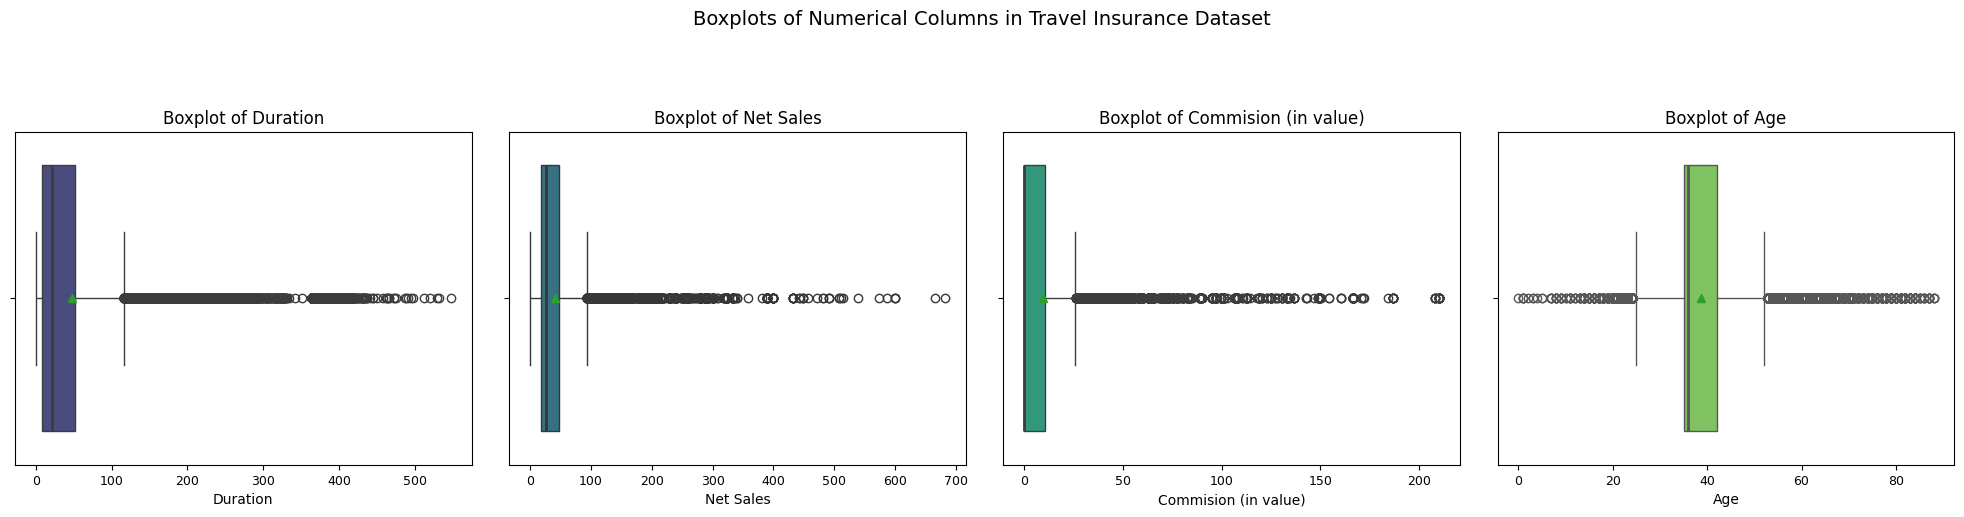

In [497]:
# check outlier

# Select numerical columns
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
selected_columns = numerical_columns[:4]

# Create a visually appealing color palette
color_palette = sns.color_palette("viridis", n_colors=len(numerical_columns))

# Create subplot grid with correct format
fig, axes = plt.subplots(int(np.ceil(len(numerical_columns) / 4)), 4, figsize=(20, 5 * int(np.ceil(len(numerical_columns) / 5))), sharey=True)
axes = axes.flatten()  # Ensure axes is a 1D array of axes objects

# Create boxplots for each numerical column
for i, column in enumerate(numerical_columns):
    sns.boxplot(
        x=df[column], ax=axes[i], color=color_palette[i], showmeans=True, medianprops={"linewidth": 2}
    )
    axes[i].set_title(f'Boxplot of {column}', fontsize=12)
    axes[i].set_xlabel(column, fontsize=10)

    axes[i].tick_params(axis="both", which="major", labelsize=9)  # Adjust tick label size

# Refine overall layout
plt.suptitle("Boxplots of Numerical Columns in Travel Insurance Dataset", fontsize=14, y=1.05)  # Add a comprehensive title
plt.tight_layout(pad=2)  # Adjust spacing for visual clarity
plt.show()

### **Cek Data Duplikat**

Karena pada proses analisis data dan pemodelan machine learning tidak boleh ada data duplikat, maka kita cek apakah pada data ini terdapat data duplikat. Jika masih ada data duplikat, maka data tersebut akan dihapus (di-drop)

In [498]:
# cek jumlah data duplikat

df.duplicated().sum()

np.int64(4746)

**Insight**

Terdapat 4.746 data duplikat

### **Drop Data Duplikat**

In [499]:
# delete duplicate data

df = df.drop_duplicates()
df.head()

,Agency,Agency Type,Distribution Channel,Product Name,Duration,Destination,Net Sales,Commision (in value),Age,Claim
0,C2B,Airlines,Online,Annual Silver Plan,365,SINGAPORE,216.0,54.0,57,No
1,EPX,Travel Agency,Online,Cancellation Plan,4,MALAYSIA,10.0,0.0,33,No
2,JZI,Airlines,Online,Basic Plan,19,INDIA,22.0,7.7,26,No
3,EPX,Travel Agency,Online,2 way Comprehensive Plan,20,UNITED STATES,112.0,0.0,59,No
4,C2B,Airlines,Online,Bronze Plan,8,SINGAPORE,16.0,4.0,28,No


### **Cek Info Umum Setelah Dilakukan Data Cleaning**

In [500]:
# extract general info

list_item = []

for i in df.columns :
    list_item.append([
        i,
        df[i].dtype,
        df[i].isna().sum(),
        round(df[i].isna().sum()/len(df)*100,2),
        df[i].nunique(),
        df[i].unique()[:3]
    ])

info_df = pd.DataFrame(list_item,
                       columns = 'Nama Kolom, Tipe Data, Jumlah Missing Value, % Missing Value, N Unique, Unique Sample'.split(', '))

info_df

,Nama Kolom,Tipe Data,Jumlah Missing Value,% Missing Value,N Unique,Unique Sample
0,Agency,object,0,0.0,15,"[C2B, EPX, JZI]"
1,Agency Type,object,0,0.0,2,"[Airlines, Travel Agency]"
2,Distribution Channel,object,0,0.0,2,"[Online, Offline]"
3,Product Name,object,0,0.0,26,"[Annual Silver Plan, Cancellation Plan, Basic ..."
4,Duration,int64,0,0.0,421,"[365, 4, 19]"
5,Destination,object,0,0.0,136,"[SINGAPORE, MALAYSIA, INDIA]"
6,Net Sales,float64,0,0.0,868,"[216.0, 10.0, 22.0]"
7,Commision (in value),float64,0,0.0,882,"[54.0, 0.0, 7.7]"
8,Age,int64,0,0.0,88,"[57, 33, 26]"
9,Claim,object,0,0.0,2,"[No, Yes]"


In [501]:
# cek baris dan kolom

df.shape

(38412, 10)

### **Cek Jumlah Data Target**

Karena akan dibuat model machine learning untuk menentukan apakah seseorang akan klaim asuransi perjalanannya atau tidak, maka kolom targetnya adalah kolom 'Claim', dimana kolom ini berisi Yes dan No.
- Yes berarti orang tersebut klaim asuransi perjalanannya.
- No berarti orang tersebut tidak klaim asuransi perjalanannya.

Jumlah data target perlu dicek agar kita bisa menentukan proses dalam pembuatan machine learningnya, apakah perlu balancing atau tidak.

In [502]:
# check imbalance data target (%)

target= df['Claim'].value_counts()/len(df)*100
target

Claim
No     98.266167
Yes     1.733833
Name: count, dtype: float64

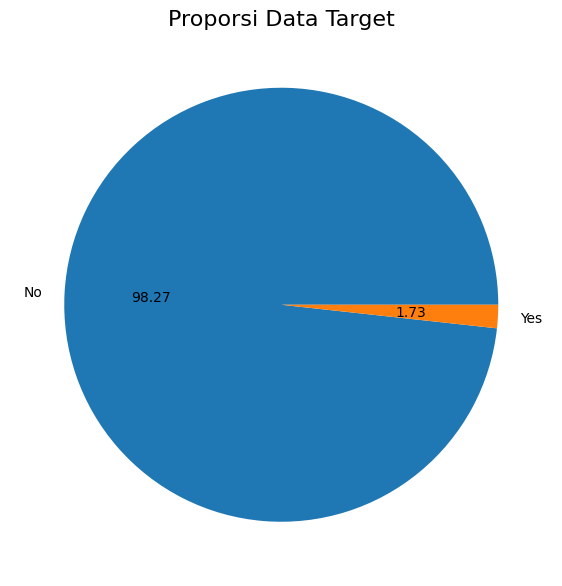

In [503]:
# proporsi jumlah data target

plt.figure(figsize=(7,8)) 
plt.pie(target,labels = ['No','Yes'], autopct = '%.02f')                     
plt.title('Proporsi Data Target', size=16) 
plt.show()

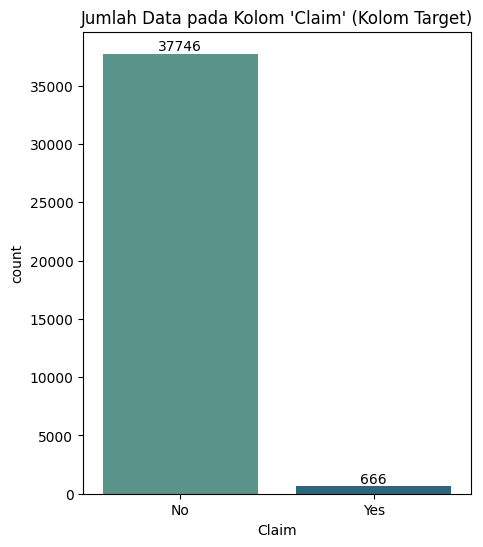

In [504]:
plt.figure(figsize=(5,6))
bar = sns.countplot(data = df, x = 'Claim', palette='crest')
plt.title("Jumlah Data pada Kolom 'Claim' (Kolom Target)", size = 12)
for i in range(df['Claim'].nunique()):
    bar.bar_label(bar.containers[i],size = 10)
plt.show()

**Insight**

Jumlah data target tidak seimbang antara yang klaim dan tidak klaim.

### **Insight Keseluruhan**

1. Terdapat lebih dari 70% missing values hanya di kolom 'Gender', sehingga kolom tersebut didrop.
2. Terdapat data duplikat, sehingga data duplikat tersebut didrop.
3. Ada 38.412 data dengan 10 kolom setelah missing value dan data duplikat diberikan treatment.
4. Data target imbalance, dengan persentase status claim 'No' adalah 98% dan status claim 'Yes' sebesar 2%, sehingga di tahap selanjutnya kita akan membandingkan recall score antara model tanpa balancing method dan model dengan balancing method.
5. Pada kolom 'Duration' dan 'Net Sales' ditemukan data bernilai negatif, dimana pada kedua kolom tersebut seharusnya tidak mungkin ada nilai negatif, sehingga data dengan nilai negatif tersebut didrop.
6. Pada kolom 'Duration' terdapat lama perjalanan yang lebih dari 1 tahun atau 365 hari, dimana 365 hari adalah lama perjalanan maksimum untuk satu polis.
5. Data numerik, yaitu data pada kolom 'Duration', 'Net Sales', 'Commision (in value)', 'Age' semuanya memiliki outliers.
6. Karena pada kolom 'Duration', 'Age', dan 'Commision (in value)' keduanya memiliki outliers yang ekstrem, maka outliers tersebut didrop.

## **Feature Selection**

Pada langkah ini, akan dilakukan pengecekan hubungan setiap kolom dengan kolom target. Kolom-kolom yang berhubungan erat dengan kolom target akan dijadikan sebagai feature, sehingga kolom yang hubungannya tidak kuat dengan kolom target akan didrop.

Tahap ini akan dipisah menjadi dua, yaitu:
1. Cek hubungan kolom kategorik dengan kolom target
2. Cek hubungan kolom numerik dengan kolom target

Tahap tersebut dipisah menjadi dua karena dilakukan dengan metode yang berbeda.

In [505]:
df.head()

,Agency,Agency Type,Distribution Channel,Product Name,Duration,Destination,Net Sales,Commision (in value),Age,Claim
0,C2B,Airlines,Online,Annual Silver Plan,365,SINGAPORE,216.0,54.0,57,No
1,EPX,Travel Agency,Online,Cancellation Plan,4,MALAYSIA,10.0,0.0,33,No
2,JZI,Airlines,Online,Basic Plan,19,INDIA,22.0,7.7,26,No
3,EPX,Travel Agency,Online,2 way Comprehensive Plan,20,UNITED STATES,112.0,0.0,59,No
4,C2B,Airlines,Online,Bronze Plan,8,SINGAPORE,16.0,4.0,28,No


### **Cek Hubungan Data Kategorik dengan Kolom Target**

Untuk mengecek hubungan data kategorik dengan kolom target, kita gunakan metode chi square.

Jika p-value < 0,05 maka kolom tersebut mempunyai pengaruh terhadap kolom lainnya, dalam hal ini adalah kolom targetnya.

In [506]:
# cek korelasi data kategorik menggunakan chi-square

chi_result = []
for column in df.select_dtypes(include=['object']):
    cont_tabel = pd.crosstab(df[column],df['Claim'])
    chi2, pval, dof, expected = chi2_contingency(cont_tabel)
    # pval < 0.05 --> suatu kategori mempunyai pengaruh dg kategori lainnya
    pengaruh = pval < 0.05
    chi_result.append([
        column,
        chi2,
        pval,
        pengaruh
    ])

chi_df = pd.DataFrame(
    chi_result,
    columns=['Feature, Chi-Square Stats, P Value, Berpengaruh Terhadap Target(?)'.split(', ')]
)

chi_df

,Feature,Chi-Square Stats,P Value,Berpengaruh Terhadap Target(?)
0,Agency,1343.008181,3.008364e-278,True
1,Agency Type,448.128960,1.842076e-99,True
2,Distribution Channel,0.720303,3.960444e-01,False
3,Product Name,1575.707537,0.000000e+00,True
4,Destination,760.004554,9.079100e-88,True
5,Claim,38353.329101,0.000000e+00,True


**Insight**

Dari tabel tersebut, kita peroleh kolom yang memiliki pengaruh terhadap kolom target adalah kolom 'Agency', 'Agency Type', 'Product Name', dan 'Destination'.

### **Cek Korelasi Data Numerik dengan Kolom Target**

Pengecekan korelasi data numerik dapat dilakukan jika semua kolom yang akan dicek berbentuk numerik.

Untuk mengecek korelasi data numerik dengan kolom target, kita ubah kolom target dari kategorik menjadi numerik dengan:
- Yes : 1
- No : 0

Artinya 'Yes' dijadikan sebagai target positif karena kita akan memprediksi apakah pemegang polis akan meng-klaim asuransinya, dimana ketika pemegang polis meng-klaim asuransi, maka di kolom target akan ditulis 'Yes'.

Suatu kolom dikatakan berkorelasi dengan kolom lain, dalam hal ini adalah kolom target, jika nilai korelasinya lebih dari atau sama dengan 10%, sehingga jika nilai korelasinya di bawah 10%, kolom tersebut akan didrop atau tidak dijadikan sebagai feature.

In [507]:
# mengubah kolom target dari kategorik ke numerik

df['Claim']=df['Claim'].replace(['Yes','No'],[1,0])
df.head()

,Agency,Agency Type,Distribution Channel,Product Name,Duration,Destination,Net Sales,Commision (in value),Age,Claim
0,C2B,Airlines,Online,Annual Silver Plan,365,SINGAPORE,216.0,54.0,57,0
1,EPX,Travel Agency,Online,Cancellation Plan,4,MALAYSIA,10.0,0.0,33,0
2,JZI,Airlines,Online,Basic Plan,19,INDIA,22.0,7.7,26,0
3,EPX,Travel Agency,Online,2 way Comprehensive Plan,20,UNITED STATES,112.0,0.0,59,0
4,C2B,Airlines,Online,Bronze Plan,8,SINGAPORE,16.0,4.0,28,0


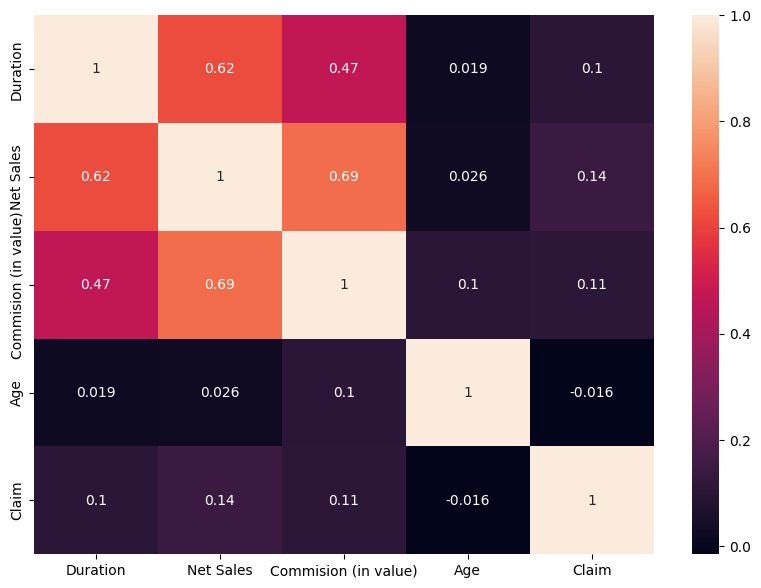

In [508]:
# cek korelasi untuk data numerik

df_num = df[['Duration', 'Net Sales', 'Commision (in value)','Age','Claim']]

plt.figure(figsize=(10,7))
sns.heatmap(df_num.corr(),annot=True)
plt.show()

**Insight**

Kolom yang memiliki korelasi lebih dari atau sama dengan 10% dengan kolom target adalah:
- Commision (in value)
- Net Sales
- Duration

Kolom yang memiliki korelasi kurang dari 10% adalah kolom 'Age', sehingga kolom 'Age' tidak akan digunakan sebagai feature.

### **Definisikan Data yang Akan Digunakan**

Berisi data dengan kolom feature dan kolom target

Target : Claim, dengan

    - 1 : Yes
    - 0 : No

Feature :

    1. Agency 
    2. Agency Type
    3. Product Name
    4. Destination
    5. Net Sales
    6. Commision (in value)
    7. Duration

In [509]:
# Pemilihan Feature

df_final = df[['Agency', 'Agency Type', 'Product Name',
       'Duration',
       'Destination', 'Net Sales', 'Commision (in value)', 
       'Claim']]
df_final

,Agency,Agency Type,Product Name,Duration,Destination,Net Sales,Commision (in value),Claim
0,C2B,Airlines,Annual Silver Plan,365,SINGAPORE,216.0,54.00,0
1,EPX,Travel Agency,Cancellation Plan,4,MALAYSIA,10.0,0.00,0
2,JZI,Airlines,Basic Plan,19,INDIA,22.0,7.70,0
3,EPX,Travel Agency,2 way Comprehensive Plan,20,UNITED STATES,112.0,0.00,0
4,C2B,Airlines,Bronze Plan,8,SINGAPORE,16.0,4.00,0
...,...,...,...,...,...,...,...,...
44323,EPX,Travel Agency,2 way Comprehensive Plan,14,CHINA,30.0,0.00,1
44324,CWT,Travel Agency,Rental Vehicle Excess Insurance,17,AUSTRALIA,79.2,47.52,0
44325,TST,Travel Agency,Travel Cruise Protect,64,THAILAND,30.0,10.50,0
44326,EPX,Travel Agency,2 way Comprehensive Plan,51,CHINA,36.0,0.00,0


### **Info Umum Tentang Data Final yang Akan Digunakan**

Hal ini dilakukan untuk menentukan langkah feature engineering apa yang akan dilakukan.

In [510]:
# extract general info

list_item = []

for i in df_final.columns :
    list_item.append([
        i,
        df_final[i].dtype,
        df_final[i].isna().sum(),
        round(df_final[i].isna().sum()/len(df_final)*100,2),
        df_final[i].nunique(),
        df_final[i].unique()[:3],
    ])

info_df_final = pd.DataFrame(list_item,
                       columns = 'Nama Kolom, Tipe Data, Jumlah Missing Value, % Missing Value, N Unique, Unique Sample'.split(', '))

info_df_final

,Nama Kolom,Tipe Data,Jumlah Missing Value,% Missing Value,N Unique,Unique Sample
0,Agency,object,0,0.0,15,"[C2B, EPX, JZI]"
1,Agency Type,object,0,0.0,2,"[Airlines, Travel Agency]"
2,Product Name,object,0,0.0,26,"[Annual Silver Plan, Cancellation Plan, Basic ..."
3,Duration,int64,0,0.0,421,"[365, 4, 19]"
4,Destination,object,0,0.0,136,"[SINGAPORE, MALAYSIA, INDIA]"
5,Net Sales,float64,0,0.0,868,"[216.0, 10.0, 22.0]"
6,Commision (in value),float64,0,0.0,882,"[54.0, 0.0, 7.7]"
7,Claim,int64,0,0.0,2,"[0, 1]"


**Insight**

1. Untuk tipe data 'object'

    Karena data-data tersebut tidak ada yang memperhatikan urutan atau mempunyai urutan, maka jenis encoding yang dapat digunakan adalah Binary Encoder atau One Hot Encoder.
- Karena n-unique dari kolom 'Agency', 'Product Name', 'Destination' lebih dari 5, maka digunakan Binary Encoder untuk encoding data kategorik menjadi data numerik.
- Karena n-unique dari kolom 'Agency Type' kurang dari 5, maka digunakan One Hot Encoder untuk encoding data kategorik menjadi data numerik.

2. Untuk tipe data 'float' dan 'int'

    Karena data tersebut sudah berupa numerik, maka tidak perlu dilakukan encoding, sehingga kita hanya perlu melakukan scalling. Kita akan menggunakan robust scaler karena metode scalling tersebut lebih robust terhadap adanya data outliers.

### **Menentukan Feature Engineering yang Akan Dilakukan Berdasarkan Insight yang Diperoleh**

In [512]:
# tabel encoding masing-masing feature

pd.DataFrame({
    'Feature' : ['Agency','Agency Type','Product Name','Duration','Destination','Net Sales','Commision (in value)'],
    'Tipe Data' : ['Object','Object','Object','Int','Object','Float','Float'],
    'Jenis Encoding' : ['Binary Encoder', 'One Hot Encoder', 'Binary Encoder','Robust Scaler','Binary Encoder','Robust Scaler', 'Robust Scaler']
})

,Feature,Tipe Data,Jenis Encoding
0,Agency,Object,Binary Encoder
1,Agency Type,Object,One Hot Encoder
2,Product Name,Object,Binary Encoder
3,Duration,Int,Robust Scaler
4,Destination,Object,Binary Encoder
5,Net Sales,Float,Robust Scaler
6,Commision (in value),Float,Robust Scaler


## **Preprocessing**

### **Definisikan X dan y**

- X adalah kolom feature
- y adalah kolom target

In [513]:
# define x and y

X = df_final.drop('Claim', axis=1)
y = df_final['Claim']

### **Lakukan Split Data**

Data akan dibagi menjadi data train (data latih) dan data test (data uji) dengan perbandingan banyak data train dan data test adalah 80% : 20%.

In [514]:
# Split Data (Train & Test)

xtrain, xtest, ytrain, ytest = train_test_split(
    X,
    y,
    test_size = 0.2,
    random_state= 2024,
    stratify = y
)

### **Membuat Skema Preprocessing**

Pada tahap ini, akan dilakukan feature engineering, yaitu proses encoding dan scalling yang telah ditentukan sebelumnya.

In [515]:
# Membuat skema preprocessing

one_hot_col = ['Agency Type']
binary_en_col = ['Agency', 'Product Name', 'Destination']
rs_col = ['Duration','Net Sales','Commision (in value)']

preprocessing = ColumnTransformer(
    transformers = [
        ('OHE', OneHotEncoder(handle_unknown='ignore'), one_hot_col),
        ('BinaryEnc', ce.BinaryEncoder(),binary_en_col),
        ('RobustScal', RobustScaler(), rs_col)
    ], remainder = 'passthrough'
)

preprocessing

ColumnTransformer(remainder='passthrough',
                  transformers=[('OHE', OneHotEncoder(handle_unknown='ignore'),
                                 ['Agency Type']),
                                ('BinaryEnc', BinaryEncoder(),
                                 ['Agency', 'Product Name', 'Destination']),
                                ('RobustScal', RobustScaler(),
                                 ['Duration', 'Net Sales',
                                  'Commision (in value)'])])

## **Membuat Model Machine Learning**

Karena kita akan memprediksi apakah seseorang akan klaim asuransinya atau tidak, maka kita gunakan model klasifikasi.

### **Mendefinisikan Model yang Akan Digunakan**

In [516]:
# Initialize Models

dt = DecisionTreeClassifier(random_state=2024)
knn = KNeighborsClassifier()
logreg = LogisticRegression(random_state=2024)
nb = GaussianNB()

hard_vote = VotingClassifier([
    ('knn',knn),
    ('LogReg', logreg),
    ('DT', dt),
    ('Naive Bayes', nb),
], voting='hard')

stacking = StackingClassifier([
    ('knn',knn),
    ('LogReg', logreg),
    ('DT', dt),
    ('Naive Bayes', nb),
], final_estimator=dt)

rf = RandomForestClassifier(random_state=2024)

adb = AdaBoostClassifier(random_state=2024)

bagging = BaggingClassifier(n_estimators=300, random_state=2024)

xgb = XGBClassifier()

gb = GradientBoostingClassifier(random_state=2024)

models = {
    'DecisionTree': dt,
    'KNN': knn,
    'Logistic Regression' : logreg,
    'Naive Beiyes' : nb,
    'Hard Vote' : hard_vote,
    'Stacking' : stacking,
    'Random Forest' : rf,
    'Adaboost' : adb,
    'Bagging' : bagging,
    'XG Boost' : xgb,
    'Gradient Boost' : gb
}

### **Membuat Pipeline Model Tanpa Balancing Data Target**

Proses ini dilakukan untuk melihat recall score jika data tidak diseimbangkan lebih dulu, mengingat data target yang jumlahnya tidak seimbang.

In [517]:
# Create Pipeline model tanpa Balancing

hasil = []
namaModel = []

for model in models.items() :
    model_pipe = Pipeline(steps = [
        ('Pre Process', preprocessing),
        ('Model', model[1])
    ])

    cv_score = cross_val_score(model_pipe, xtrain, ytrain, cv=5, scoring = 'recall')

    hasil.append({
        'Model' : model[0],
        'Recall' : cv_score,
        'AVG Recall' : cv_score.mean(),
        'Std Recall' : cv_score.std()
    })

pd.DataFrame(hasil).sort_values('AVG Recall', ascending = False)

,Model,Recall,AVG Recall,Std Recall
3,Naive Beiyes,"[0.6509433962264151, 0.6728971962616822, 0.682...",0.643414,0.037715
5,Stacking,"[0.05660377358490566, 0.037383177570093455, 0....",0.050661,0.009561
0,DecisionTree,"[0.02830188679245283, 0.04672897196261682, 0.0...",0.046852,0.013093
8,Bagging,"[0.018867924528301886, 0.018691588785046728, 0...",0.024370,0.007424
6,Random Forest,"[0.018867924528301886, 0.028037383177570093, 0...",0.022483,0.007428
1,KNN,"[0.009433962264150943, 0.009345794392523364, 0...",0.007494,0.003747
9,XG Boost,"[0.009433962264150943, 0.009345794392523364, 0...",0.005625,0.004593
10,Gradient Boost,"[0.009433962264150943, 0.0, 0.0, 0.00934579439...",0.003756,0.004600
4,Hard Vote,"[0.0, 0.0, 0.0, 0.009345794392523364, 0.0]",0.001869,0.003738
2,Logistic Regression,"[0.0, 0.0, 0.0, 0.0, 0.0]",0.000000,0.000000


### **Definisikan Metode Balancing pada Data Target**

Karena data target jumlahnya tidak seimbang, yaitu untuk data target negatif nilainya sekitar 98% dan data target positif nilainya sekitar 2%, maka diperlukan balancing pada data target.

In [518]:
# Definisikan balancing methode
balancing_methods = {
    'SMOTE': SMOTE(random_state=2024),
    'ADASYN': ADASYN(random_state=2024),
    'RandomOverSampler': RandomOverSampler(random_state=2024),
    'RandomUnderSampler': RandomUnderSampler(random_state=2024),
    'NearMiss': NearMiss(version=3),
    'TomekLinks': TomekLinks(),
    'BorderlineSMOTE' : BorderlineSMOTE(random_state = 2024)
}

### **Membuat Pipeline Model dengan Balancing Data Target**

Pada tahap ini, kita akan bandingkan recall score untuk setiap model. Lima model dengan recall score terbaik, akan diambil untuk selanjutnya dilakukan hyperparameter tuning. Harapannya, dengan melakukan hyperparameter tuning, recall score akan meningkat dan memperbagus model untuk diterapkan ke data baru.

In [519]:
# Create Pipeline model dengan Balancing

hasil = []
namaModel = []

for model in models.items() :
    for i in balancing_methods.items():
        model_pipe = Pipeline(steps = [
            ('Pre Process', preprocessing),
            ('Balancing', i[1]), 
            ('Model', model[1])
        ])

        cv_score = cross_val_score(model_pipe, xtrain, ytrain, cv=5, scoring = 'recall')

        hasil.append({
            'Model' : model[0],
            'Resample' : i[0],
            'Recall' : cv_score,
            'AVG Recall' : cv_score.mean(),
            'Std Recall' : cv_score.std()
        })

In [520]:
pd.DataFrame(hasil).sort_values('AVG Recall', ascending = False)

,Model,Resample,Recall,AVG Recall,Std Recall
10,KNN,RandomUnderSampler,"[0.7641509433962265, 0.7383177570093458, 0.775...",0.739129,0.036992
39,Stacking,NearMiss,"[0.7358490566037735, 0.7476635514018691, 0.728...",0.735443,0.007499
22,Naive Beiyes,ADASYN,"[0.6792452830188679, 0.6915887850467289, 0.728...",0.724352,0.065312
24,Naive Beiyes,RandomUnderSampler,"[0.660377358490566, 0.7102803738317757, 0.7476...",0.724264,0.056393
73,Gradient Boost,RandomUnderSampler,"[0.660377358490566, 0.7383177570093458, 0.8411...",0.722060,0.070400
...,...,...,...,...,...
68,XG Boost,TomekLinks,"[0.009433962264150943, 0.009345794392523364, 0...",0.007494,0.006999
75,Gradient Boost,TomekLinks,"[0.009433962264150943, 0.0, 0.0, 0.00934579439...",0.003756,0.004600
33,Hard Vote,TomekLinks,"[0.0, 0.009345794392523364, 0.0, 0.00934579439...",0.003738,0.004578
19,Logistic Regression,TomekLinks,"[0.0, 0.0, 0.0, 0.0, 0.0]",0.000000,0.000000


**Insight**

Dari perbandingan model dengan balancing, diperoleh lima model dengan rata-rata recall score tertinggi, yaitu:
1. KNN dengan metode balancing Random Under Sampler
2. Stacking dengan metode balancing NearMiss
3. Naive Beiyes dengan metode balancing ADASYN
4. Naive Beiyes dengan metode balancing Random Under Sampler
5. Gradient Boost dengan metode balancing Random Under Sampler

## **Melakukan Hyperparameter Tuning**

Hyperparameter tuning yang digunakan adalah dengan metode Randomized mengingat batas waktu pengerjaan yang pendek. Untuk mendapatkan hasil yang lebih optimal, bisa digunakan metode Grid Search, namun dengan waktu pengerjaan yang lebih lama daripada metode Randomized.

Hyperparameter tuning akan dilakukan untuk lima model, yaitu:
1. KNN dengan metode balancing Random Under Sampler
2. Stacking dengan metode balancing NearMiss
3. Naive Beiyes dengan metode balancing ADASYN
4. Naive Beiyes dengan metode balancing Random Under Sampler
5. Gradient Boost dengan metode balancing Random Under Sampler

In [521]:
# definisikan metode balancing

randUnderSamp = RandomUnderSampler(random_state=2024)
adasyn = ADASYN(random_state=2024)
nearmiss = NearMiss(version=3)

### **Hyperparameter Tuning KNN**

In [549]:
# pipeline model KNN untuk hyperparameter tuning

pipe_prep_model=Pipeline([
    ('preprocessing',preprocessing),
    ('Balancing', randUnderSamp),
    ('modeling', knn)
])

# hyperparameter : parameter yang akan dicek

hyperparam = {
    'modeling__n_neighbors' : range(3,15),
    'modeling__leaf_size' : range(10,40),
    'modeling__p': (1,2)
}

# randomized search --> mencoba n kombinasi

randsearch_knn = RandomizedSearchCV(
    estimator = pipe_prep_model,
    param_distributions= hyperparam,
    n_iter = 40,
    scoring = 'recall',
    n_jobs = -1,
    cv = 10
)

randsearch_knn.fit(xtrain, ytrain)

RandomizedSearchCV(cv=10,
                   estimator=Pipeline(steps=[('preprocessing',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('OHE',
                                                                               OneHotEncoder(handle_unknown='ignore'),
                                                                               ['Agency '
                                                                                'Type']),
                                                                              ('BinaryEnc',
                                                                               BinaryEncoder(),
                                                                               ['Agency',
                                                                                'Product '
                                                                                'Name',
                                                                                'Destination']),
                                                                              ('RobustScal',
                                                                               RobustScaler(),
                                                                               ['Duration',
                                                                                'Net '
                                                                                'Sales',
                                                                                'Commision '
                                                                                '(in '
                                                                                'value)'])])),
                                             ('Balancing',
                                              RandomUnderSampler(random_state=2024)),
                                             ('modeling',
                                              KNeighborsClassifier())]),
                   n_iter=40, n_jobs=-1,
                   param_distributions={'modeling__leaf_size': range(10, 40),
                                        'modeling__n_neighbors': range(3, 15),
                                        'modeling__p': (1, 2)},
                   scoring='recall')

In [550]:
randsearch_knn.best_params_

{'modeling__p': 1, 'modeling__n_neighbors': 9, 'modeling__leaf_size': 36}

In [551]:
randsearch_knn.best_score_

np.float64(0.7580363382250175)

In [ ]:
StackingClassifier()

### **Hyperparameter Tuning Stacking**

In [552]:
# pipeline model Stacking untuk hyperparameter tuning

pipe_prep_model=Pipeline([
    ('preprocessing',preprocessing),
    ('Balancing', nearmiss),
    ('modeling', stacking)
])

# hyperparameter : parameter yang akan dicek

hyperparam = {
    'modeling__final_estimator' : [knn,logreg,dt,nb],
    'modeling__cv' : range(5,21,5),
}

# randomized search --> mencoba n kombinasi

randsearch_stacking = RandomizedSearchCV(
    estimator = pipe_prep_model,
    param_distributions= hyperparam,
    n_iter = 40,
    scoring = 'recall',
    n_jobs = -1,
    cv = 10
)

randsearch_stacking.fit(xtrain, ytrain)

RandomizedSearchCV(cv=10,
                   estimator=Pipeline(steps=[('preprocessing',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('OHE',
                                                                               OneHotEncoder(handle_unknown='ignore'),
                                                                               ['Agency '
                                                                                'Type']),
                                                                              ('BinaryEnc',
                                                                               BinaryEncoder(),
                                                                               ['Agency',
                                                                                'Product '
                                                                                'Name',
                                                                                'Destination']),
                                                                              ('RobustScal',
                                                                               RobustScaler(),
                                                                               ['Duration',
                                                                                'Net '
                                                                                'Sales',
                                                                                'Commision '
                                                                                '(in '
                                                                                'value)'])])),
                                             ('Balan...
                                                                              DecisionTreeClassifier(random_state=2024)),
                                                                             ('Naive '
                                                                              'Bayes',
                                                                              GaussianNB())],
                                                                 final_estimator=DecisionTreeClassifier(random_state=2024)))]),
                   n_iter=40, n_jobs=-1,
                   param_distributions={'modeling__cv': range(5, 21, 5),
                                        'modeling__final_estimator': [KNeighborsClassifier(),
                                                                      LogisticRegression(random_state=2024),
                                                                      DecisionTreeClassifier(random_state=2024),
                                                                      GaussianNB()]},
                   scoring='recall')

In [553]:
randsearch_stacking.best_params_

{'modeling__final_estimator': DecisionTreeClassifier(random_state=2024),
 'modeling__cv': 5}

In [554]:
randsearch_stacking.best_score_

np.float64(0.733298392732355)

### **Hyperparameter Tuning Naive Beiyes**

- dengan metode balancing adasyn
- dengan metode balancing random under sampler

#### **Dengan Metode Balancing ADASYN**

In [555]:
# pipeline model Naive Beiyes dengan metode resampling adasyn untuk hyperparameter tuning

pipe_prep_model=Pipeline([
    ('preprocessing',preprocessing),
    ('Balancing', adasyn),
    ('modeling', nb)
])

# hyperparameter : parameter yang akan dicek

hyperparam = {
    'modeling__var_smoothing': np.logspace(0,-9, num=100)
}

# randomized search --> mencoba n kombinasi

randsearch_nb_adasyn = RandomizedSearchCV(
    estimator = pipe_prep_model,
    param_distributions= hyperparam,
    n_iter = 40,
    scoring = 'recall',
    n_jobs = -1,
    cv = 10
)

randsearch_nb_adasyn.fit(xtrain, ytrain)

RandomizedSearchCV(cv=10,
                   estimator=Pipeline(steps=[('preprocessing',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('OHE',
                                                                               OneHotEncoder(handle_unknown='ignore'),
                                                                               ['Agency '
                                                                                'Type']),
                                                                              ('BinaryEnc',
                                                                               BinaryEncoder(),
                                                                               ['Agency',
                                                                                'Product '
                                                                                'Name',
                                                                                'Destination']),
                                                                              ('RobustScal',
                                                                               RobustScaler(),
                                                                               ['Duration',
                                                                                'Net '
                                                                                'Sales',
                                                                                'Commision '
                                                                                '(in '
                                                                                'value)'])])),
                                             ('Balan...
       1.23284674e-07, 1.00000000e-07, 8.11130831e-08, 6.57933225e-08,
       5.33669923e-08, 4.32876128e-08, 3.51119173e-08, 2.84803587e-08,
       2.31012970e-08, 1.87381742e-08, 1.51991108e-08, 1.23284674e-08,
       1.00000000e-08, 8.11130831e-09, 6.57933225e-09, 5.33669923e-09,
       4.32876128e-09, 3.51119173e-09, 2.84803587e-09, 2.31012970e-09,
       1.87381742e-09, 1.51991108e-09, 1.23284674e-09, 1.00000000e-09])},
                   scoring='recall')

In [541]:
randsearch_nb_adasyn.best_params_

{'modeling__var_smoothing': np.float64(1.519911082952933e-09)}

In [542]:
randsearch_nb_adasyn.best_score_

np.float64(0.726221125022042)

#### **Dengan Metode Balancing Random Under Sampler**

In [556]:
# pipeline model Naive Beiyes dengan metode resampling random under sampler untuk hyperparameter tuning

pipe_prep_model=Pipeline([
    ('preprocessing',preprocessing),
    ('Balancing', randUnderSamp),
    ('modeling', nb)
])

# hyperparameter : parameter yang akan dicek

hyperparam = {
    'modeling__var_smoothing': np.logspace(0,-9, num=100)
}

# randomized search --> mencoba n kombinasi

randsearch_nb_rus = RandomizedSearchCV(
    estimator = pipe_prep_model,
    param_distributions= hyperparam,
    n_iter = 40,
    scoring = 'recall',
    n_jobs = -1,
    cv = 10
)

randsearch_nb_rus.fit(xtrain, ytrain)

RandomizedSearchCV(cv=10,
                   estimator=Pipeline(steps=[('preprocessing',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('OHE',
                                                                               OneHotEncoder(handle_unknown='ignore'),
                                                                               ['Agency '
                                                                                'Type']),
                                                                              ('BinaryEnc',
                                                                               BinaryEncoder(),
                                                                               ['Agency',
                                                                                'Product '
                                                                                'Name',
                                                                                'Destination']),
                                                                              ('RobustScal',
                                                                               RobustScaler(),
                                                                               ['Duration',
                                                                                'Net '
                                                                                'Sales',
                                                                                'Commision '
                                                                                '(in '
                                                                                'value)'])])),
                                             ('Balan...
       1.23284674e-07, 1.00000000e-07, 8.11130831e-08, 6.57933225e-08,
       5.33669923e-08, 4.32876128e-08, 3.51119173e-08, 2.84803587e-08,
       2.31012970e-08, 1.87381742e-08, 1.51991108e-08, 1.23284674e-08,
       1.00000000e-08, 8.11130831e-09, 6.57933225e-09, 5.33669923e-09,
       4.32876128e-09, 3.51119173e-09, 2.84803587e-09, 2.31012970e-09,
       1.87381742e-09, 1.51991108e-09, 1.23284674e-09, 1.00000000e-09])},
                   scoring='recall')

In [557]:
randsearch_nb_rus.best_params_

{'modeling__var_smoothing': np.float64(2.310129700083158e-09)}

In [558]:
randsearch_nb_rus.best_score_

np.float64(0.6812019566736548)

### **Hyperparameter Tuning Gradient Boost**

In [559]:
# pipeline model Gradient Boost untuk hyperparameter tuning

pipe_prep_model=Pipeline([
    ('preprocessing',preprocessing),
    ('Balancing', randUnderSamp),
    ('modeling', gb)
])

# hyperparameter : parameter yang akan dicek

hyperparam = {
    'modeling__n_estimators' : range(10,50,5),
    'modeling__max_depth' : range(3,15,2),
    'modeling__learning_rate': [i/100 for i in range(1,20)]
}

# randomized search --> mencoba n kombinasi

randsearch_gboost = RandomizedSearchCV(
    estimator = pipe_prep_model,
    param_distributions= hyperparam,
    n_iter = 40,
    scoring = 'recall',
    n_jobs = -1,
    cv = 10
)

randsearch_gboost.fit(xtrain, ytrain)

RandomizedSearchCV(cv=10,
                   estimator=Pipeline(steps=[('preprocessing',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('OHE',
                                                                               OneHotEncoder(handle_unknown='ignore'),
                                                                               ['Agency '
                                                                                'Type']),
                                                                              ('BinaryEnc',
                                                                               BinaryEncoder(),
                                                                               ['Agency',
                                                                                'Product '
                                                                                'Name',
                                                                                'Destination']),
                                                                              ('RobustScal',
                                                                               RobustScaler(),
                                                                               ['Duration',
                                                                                'Net '
                                                                                'Sales',
                                                                                'Commision '
                                                                                '(in '
                                                                                'value)'])])),
                                             ('Balan...
                                              RandomUnderSampler(random_state=2024)),
                                             ('modeling',
                                              GradientBoostingClassifier(random_state=2024))]),
                   n_iter=40, n_jobs=-1,
                   param_distributions={'modeling__learning_rate': [0.01, 0.02,
                                                                    0.03, 0.04,
                                                                    0.05, 0.06,
                                                                    0.07, 0.08,
                                                                    0.09, 0.1,
                                                                    0.11, 0.12,
                                                                    0.13, 0.14,
                                                                    0.15, 0.16,
                                                                    0.17, 0.18,
                                                                    0.19],
                                        'modeling__max_depth': range(3, 15, 2),
                                        'modeling__n_estimators': range(10, 50, 5)},
                   scoring='recall')

In [560]:
randsearch_gboost.best_params_

{'modeling__n_estimators': 35,
 'modeling__max_depth': 5,
 'modeling__learning_rate': 0.15}

In [561]:
randsearch_gboost.best_score_

np.float64(0.7354996505939904)

In [562]:
recall_hyperparam = {
    'KNN' : randsearch_knn.best_score_,
    'Stacking' : randsearch_stacking.best_score_,
    'Naive Beiyes with ADASYN' : randsearch_nb_adasyn.best_score_,
    'Naive Beiyes with Random Under Sampler' : randsearch_nb_rus.best_score_,
    'Gradient Boost' : randsearch_gboost.best_score_,
}

In [563]:
recall_hyperparam.items()

dict_items([('KNN', np.float64(0.7580363382250175)), ('Stacking', np.float64(0.733298392732355)), ('Naive Beiyes with ADASYN', np.float64(0.6925576519916141)), ('Naive Beiyes with Random Under Sampler', np.float64(0.6812019566736548)), ('Gradient Boost', np.float64(0.7354996505939904))])

In [564]:
tabel = []

for model in recall_hyperparam.items():
    tabel.append({
        'Model' : model[0],
        'Recall' : model[1]
    })
    
pd.DataFrame(tabel).sort_values('Recall', ascending = False)  

,Model,Recall
0,KNN,0.758036
4,Gradient Boost,0.735500
1,Stacking,0.733298
2,Naive Beiyes with ADASYN,0.692558
3,Naive Beiyes with Random Under Sampler,0.681202


## **Prediksi ke Data Uji**

Dari hasil hyperparameter tuning, dipilih model KNN dengan metode balancing Random Under Sampler karena model tersebut memiliki recall score tertinggi.

In [566]:
# define model
knn = KNeighborsClassifier()

pipe_model = Pipeline([
    ('preprocessing', preprocessing),
    ('Balancing', randUnderSamp),
    ('modeling', knn)
])

# fitting -> Train only
pipe_model.fit(xtrain, ytrain)

# predict -> X_test
y_pred_before = pipe_model.predict(xtest)

# metrics accuracy
recall_score(ytest, y_pred_before)

np.float64(0.7218045112781954)

Diperoleh recall score dengan model KNN dengan metode resampling random under sampler tanpa hyperparameter tuning adalah 0,72.

In [567]:
# define model
modelafter = KNeighborsClassifier(p = 1, n_neighbors=9, leaf_size=36)
bestmodel = randsearch_knn.best_estimator_
pipe_model = Pipeline([
    ('preprocessing', preprocessing),
    ('Balancing', randUnderSamp),
    ('modeling', modelafter)
])

# fitting -> Train only
pipe_model.fit(xtrain, ytrain)

# predict -> X_test
y_pred_after = pipe_model.predict(xtest)

# metrics accuracy
recall_score(ytest, y_pred_after)

np.float64(0.7593984962406015)

Diperoleh recall score dengan model KNN dengan metode resampling random under sampler dengan hyperparameter tuning adalah 0,76, dimana nilai ini tidak berbeda jauh dengan recall score terhadap data train dengan model dan metode resampling yang sama dengan hyperparameter tuning.

## **Dibuat Confusion Matrix**

Tujuannya adalah untuk melihat seberapa banyak data yang dapat dicapture di masing-masing kolom prediksi dan aktualnya.

In [568]:
cm_1 = confusion_matrix(ytest,y_pred_before)
cm_2 = confusion_matrix(ytest,y_pred_after)

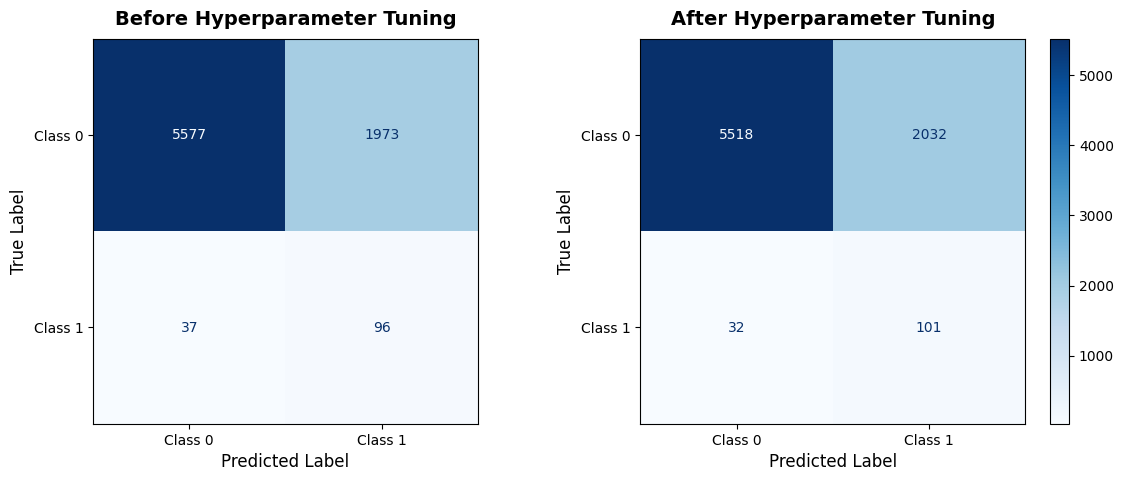

In [570]:
# Plotting both confusion matrices side by side
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Plot for the first confusion matrix (before hyperparameter tuning)
disp_1 = ConfusionMatrixDisplay(confusion_matrix=cm_1, display_labels=['Class 0', 'Class 1'])
disp_1.plot(cmap='Blues', values_format='d', ax=axes[0], colorbar=False)
axes[0].set_title('Before Hyperparameter Tuning', fontsize=14 ,pad=10, fontweight='bold')
axes[0].set_xlabel('Predicted Label', fontsize=12)
axes[0].set_ylabel('True Label', fontsize=12)

# Plot for the second confusion matrix (after hyperparameter tuning)
disp_2 = ConfusionMatrixDisplay(confusion_matrix=cm_2, display_labels=['Class 0', 'Class 1'])
disp_2.plot(cmap='Blues', values_format='d', ax=axes[1], colorbar=True)  # Enable colorbar
axes[1].set_title('After Hyperparameter Tuning', fontsize=14 ,pad=10, fontweight='bold')
axes[1].set_xlabel('Predicted Label', fontsize=12)
axes[1].set_ylabel('True Label', fontsize=12)

plt.show()

Dari confusion matrix, diperoleh setelah dilakukan hyperparameter tuning model dapat meng-capture lebih banyak data positive (Class 1)

## **Kesimpulan**

1. Data target sangat tidak seimbang
2. Setelah dilakukan perbandingan model machine learning, diperoleh recall score terbaik adalah dengan menggunakan model KNN dengan metode resampling random under sampler.
3. Model yang digunakan masih belum bekerja maksimal, walaupun recall score yang diperoleh sudah melebihi 70%.

## **Saran dan Rekomendasi**

1. Lebih baik ditambahkan data lagi untuk mengurangi ketimpangan jumlah data target.
2. Lebih baik ditambahkan feature lainnya, seperti besaran premi yang dibayarkan, tingkat risiko perjalanan, kondisi kesehatan (riwayat penyakit kronis, dsb), pendapatan pelanggan, dll.
3. Dapat ditambahkan model lainnya saat perbandingan jika waktu pengerjaan lebih lama karena model yang digunakan ini terbatas disebabkan keterbatasan waktu pengerjaan.
4. Ketika melakukan tuning, dapat digunakan metode grid search agar model lebih optimal jika waktu pengerjaan lebih lama. Pada pengerjaan ini, digunakan metode randomized untuk tuning dikarenakan keterbatasan waktu.

## **Simpan Model dengan Pickle**

In [573]:
# simpan model dengan nama knn_pickle

import pickle
with open('knn_pickle','wb') as file:
    pickle.dump(pipe_model,file)

In [576]:
# open file knn_pickle

with open('knn_pickle','rb') as file:
    knn_p= pickle.load(file)

In [ ]:
# coba cari recall score dengan menggunakan file yang telah disimpan dengan pickle

# predict -> X_test
y_pred_after = knn_p.predict(xtest)

# metrics accuracy
recall_score(ytest, y_pred_after)

np.float64(0.7593984962406015)